In [1]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel('data_final.xlsx')
df = df[['stime','forcast','section','day']]
df = df.iloc[0:2907]
df.head()

stime  forcast  section  day
0  0.274549   180.00        1    3
1  0.276493   180.00        1    1
2  0.277963   186.00        1    3
3  0.280405   192.80        1    6
4  0.282940   204.24        1    5

In [3]:
y = df['forcast']
X = df.drop('forcast', axis=1)
print(X.shape, y.shape)

(2906, 3) (2906,)


In [4]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

# split into X_train and X_test
# always split into X_train, X_test first THEN apply minmax scaler
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2179, 3) (727, 3) (2179,) (727,)


# DecisionTreeRegressor

In [5]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
model = DecisionTreeRegressor(random_state = 2) 
  
# fit the regressor with X and Y data
model.fit(X_train, y_train)
pred = model.predict(X_test)
trainpreds = model.predict(X_train)
from sklearn.metrics import r2_score
print(r2_score(y_train, trainpreds))
print(r2_score(y_test,pred))

0.9909713146197959
0.8071467333548283


In [6]:
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error
print("\nmape")
print(mape(y_train, trainpreds)) # train
print(mape(y_test, pred)) 
print('\n\n',"mse")
from sklearn.metrics import mean_squared_error as mse
print(mse(y_train, trainpreds)) # train
print(mse(y_test, pred))
print('\n\n',"mae")
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test
print('\n\n','accuracy')
from sklearn.metrics import r2_score
print(r2_score(y_train, trainpreds))
print(r2_score(y_test,pred))


mape
0.008161086471984973
0.07577979189897376


 mse
7.129696494344744
158.35906418863576


 mae
1.0392020537240045
9.370325621057393


 accuracy
0.9909713146197959
0.8071467333548283


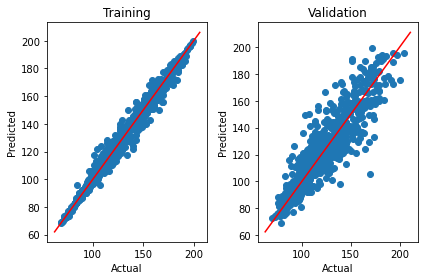

In [7]:
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

# RandomForestRegressor

In [8]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 500 decision trees
rf = RandomForestRegressor(n_estimators = 500, random_state = 11, max_depth=3)
# Train the model on training data
rf.fit(X_train, y_train)
pred = model.predict(X_test)
trainpreds = model.predict(X_train)
from sklearn.metrics import r2_score
print(r2_score(y_train, trainpreds))
print(r2_score(y_test,pred))

0.9909713146197959
0.8071467333548283


In [9]:
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error
print("\nmape")
print(mape(y_train, trainpreds)) # train
print(mape(y_test, pred)) 
print('\n\n',"mse")
from sklearn.metrics import mean_squared_error as mse
print(mse(y_train, trainpreds)) # train
print(mse(y_test, pred))
print('\n\n',"mae")
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test
print('\n\n','accuracy')
from sklearn.metrics import r2_score
print(r2_score(y_train, trainpreds))
print(r2_score(y_test,pred))


mape
0.008161086471984973
0.07577979189897376


 mse
7.129696494344744
158.35906418863576


 mae
1.0392020537240045
9.370325621057393


 accuracy
0.9909713146197959
0.8071467333548283


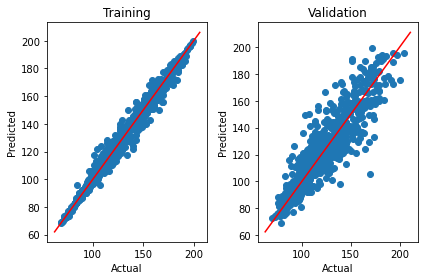

In [10]:
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

# GradientBoostingRegressor

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
lr_list = [0.110]

for learning_rate in lr_list:
    gb_clf = GradientBoostingRegressor(n_estimators=100, learning_rate=learning_rate, max_features=3
                                       , max_depth=9, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (Test): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.11
Accuracy score (training): 0.982
Accuracy score (Test): 0.849


In [12]:
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error
print("\nmape")
print(mape(y_train, trainpreds)) # train
print(mape(y_test, pred)) 
print('\n\n',"mse")
from sklearn.metrics import mean_squared_error as mse
print(mse(y_train, trainpreds)) # train
print(mse(y_test, pred))
print('\n\n',"mae")
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test
print('\n\n','accuracy')
from sklearn.metrics import r2_score
print(r2_score(y_train, trainpreds))
Predict pickup time and location and drop off time and location


mape
0.008161086471984973
0.07577979189897376


 mse
7.129696494344744
158.35906418863576


 mae
1.0392020537240045
9.370325621057393


 accuracy
0.9909713146197959
0.8071467333548283


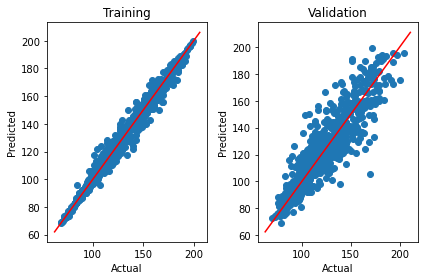

In [13]:
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [17]:
accuracy(150,169)


NameError: name 'accuracy' is not defined